<b>Objective</b>: The Objective of this project is to group the customers according to their income level and spending score so as to help the organisation ascertain loyal and most important customers

1. Cluster customers according to their income and total purchases
2. Cluster customers according Number of children at home and total purchases.

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [117]:
data = pd.read_csv("dataset\marketing_campaign.csv", sep = "\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [118]:
mc = data.copy()
mc.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [119]:
pd.set_option('display.max_columns', None)

mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [120]:
mc['total_purchase'] = mc.MntWines + mc.MntFruits +	mc.MntMeatProducts + mc.MntFishProducts + mc.MntSweetProducts + mc.MntGoldProds + \
 mc.NumDealsPurchases + mc.NumWebPurchases + mc.NumCatalogPurchases +	mc.NumStorePurchases + mc.NumStorePurchases

mc.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1646
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,35
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,807


In [121]:
# Drop Null Values
data.dropna(inplace = True)

# # write a function that calculates the number of missing values in  dataframeframe
# def cleandata(dataframe):
#     for i in dataframe.columns:
#         if (dataframe[i].isnull().sum() / dataframe.shape[0]) * 100 >= 30:
#             dataframe.drop([i], axis = 1, inplace = True)
#         elif dataframe[i].dtypes =='O':
#             dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)
#         elif dataframe[i].dtypes == 'float' or dataframe[i].dtype == 'int':
#             dataframe[i].fillna(dataframe[i].median(), inplace = True)

# cleandata(mc)
# mc.isnull().sum()

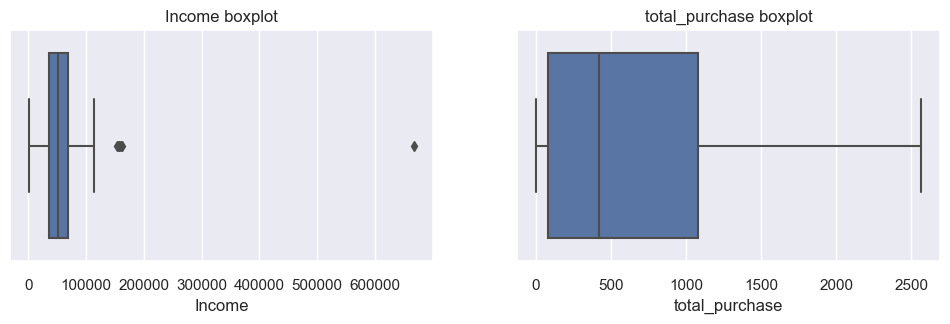

In [122]:
# Data Preprocessing
def outlier(dataframe, a, b):
    plt.figure(figsize = (12, 3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(mc, 'Income', 'total_purchase')

In [123]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
        lowerQuartile = dataframe[i].describe()[4]
        upperQuartile = dataframe[i].describe()[6]
        IQR = upperQuartile - lowerQuartile
        lowerIQR = lowerQuartile- 1.5 * IQR
        upperIQR = upperQuartile + 1.5 * IQR
        dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

mc['Income'] = outlierRemoval(mc[['Income']])
mc['total_purchase'] = outlierRemoval(mc[['total_purchase']])
mc.dropna(inplace = True)
d = mc[['Income', 'total_purchase']]
d.head()

,Income,total_purchase
0,58138.0,1646
1,46344.0,35
2,71613.0,807
3,26646.0,65
4,58293.0,447


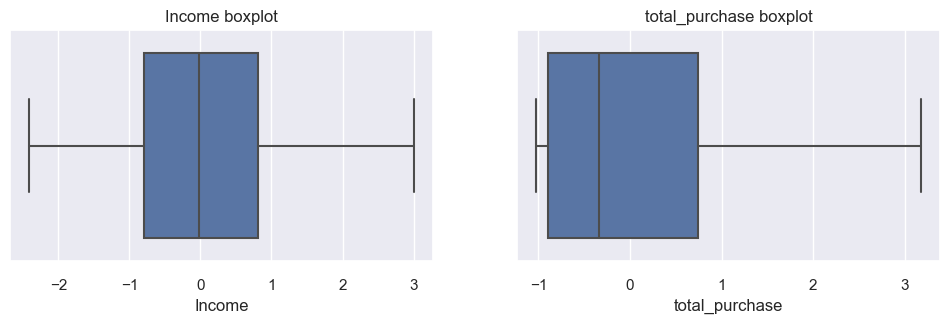

In [124]:
# Check if the outlier has been removed
def outlier(dataframe, a, b):
    plt.figure(figsize = (12, 3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(x, 'Income', 'total_purchase')

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dd = d.copy()
for i in xx:
    dd[[i]] = scaler.fit_transform(dd[[i]])

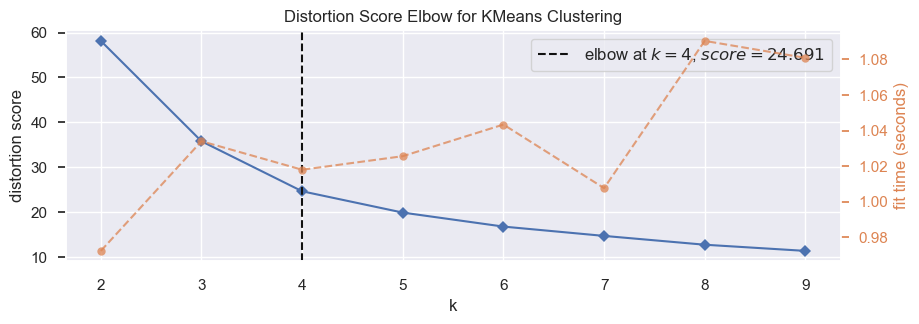

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
# We Use the Elbow plot Visualizer to ascertain the best number of Clusters

#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick  --q

from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 3))
visualizer.fit(dd) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [127]:
kmeans4 = KMeans(n_clusters = 5).fit(dd) # ..................................... Fit Kmeans Algorthm on the Data Subset
DD = dd.values
kmeans4_label = kmeans4.labels_

print(f"KMeans algortihm labels: {kmeans4.labels_}\n\n") # ............................................. Instantiate the labels of the model
print(f"cluster centers: {kmeans4.cluster_centers_}")

KMeans algortihm labels: [0 1 3 ... 4 4 1]


cluster centers: [[0.69398432 0.70391021]
 [0.37666825 0.07073151]
 [0.20578299 0.02851047]
 [0.51065767 0.25093667]
 [0.61995337 0.45187395]]


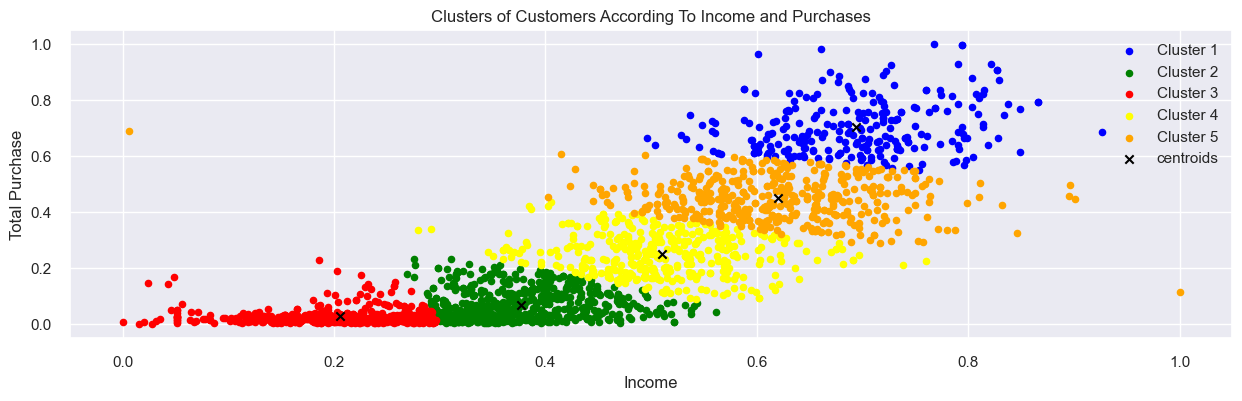

In [128]:
# Plot the dataset using the model labelling to colour code them
plt.figure(figsize=(15, 4))
sns.set(style='darkgrid')

# plt.scatter(DD = DD[:, 0], y = DD[:, 1], c = kmeans4_label, cmap = 'rainbow')
# plt.scatter(DD = kmeans_5.cluster_centers_[:, 0], y = kmeans_5.cluster_centers_[:, 1], c = 'black', label = 'centroids')
# Scatter plots for each cluster's data points
plt.scatter(DD[kmeans4_label == 0, 0], DD[kmeans4_label == 0, 1], s=20, c='blue', label='Cluster 1')
plt.scatter(DD[kmeans4_label == 1, 0], DD[kmeans4_label == 1, 1], s=20, c='green', label='Cluster 2')
plt.scatter(DD[kmeans4_label == 2, 0], DD[kmeans4_label == 2, 1], s=20, c='red', label='Cluster 3')
plt.scatter(DD[kmeans4_label == 3, 0], DD[kmeans4_label == 3, 1], s=20, c='yellow', label='Cluster 4')
plt.scatter(DD[kmeans4_label == 4, 0], DD[kmeans4_label == 4, 1], s=20, c='orange', label='Cluster 5')
plt.scatter(x = kmeans4.cluster_centers_[:, 0], y = kmeans4.cluster_centers_[:, 1], c = 'black', marker = 'x', label = 'centroids')

# Adding plot labels and legend
plt.title('Clusters of Customers According To Income and Purchases')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.legend()
plt.show()


<b><u>Interpretation</b></u>:
<ul>
<li>Class Blue: Very low income earners and very low purchases</li>
<li>Class Red: Low Income and Low Purchases</li>
<li>Class Orange: Middle Class Income and Average Purchasers</li>
<li>Class Green: High Income earners and High Purchasers</li>
<li>Class Yellow: Very High Income earners and Very High Purchasers</li>

</ul>

In [129]:
# Add the labels on the dataframe
cluster_labels = kmeans4.fit_predict(dd)
mc['K_Means'] = cluster_labels
mc['K_Means'] = mc.K_Means.map({1: 'Low and Low',
                        2: 'High and High',
                        3: 'Mid and Mid',
                        4: 'V.Low and V.Low',
                        5: 'V.High and V.High'})

mc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchase,K_Means
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1646,V.Low and V.Low
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,35,NaN
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,807,Low and Low
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,High and High
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,447,Mid and Mid


In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def transform(dataframe):
    # scale the numerical columns
    removeY = dataframe.drop(['K_Means'], axis = 1)
    for i in removeY.columns: 
        if i in dataframe.select_dtypes(include = 'number').columns: 
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    # label encode the categorical columns
    for i in dataframe.columns:
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns:
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

transform(mc)
mc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchase,K_Means
0,-0.019364,-0.984809,2,4,0.314089,-0.823235,-0.930428,80,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,0.362555,1.426013,2.628870,-0.561314,0.690245,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,2.372895,1.669680,3
1,-1.050649,-1.235034,2,4,-0.255431,1.039166,0.907126,157,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,-0.167943,-1.132369,-0.587934,-1.178383,-0.138499,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,-0.971509,4
2,-0.445115,-0.317541,2,5,0.964782,-0.823235,-0.930428,444,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,-0.698440,1.426013,-0.230512,1.289891,-0.552871,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,0.294163,1
3,0.183199,1.267219,2,5,-1.206626,1.039166,-0.930428,199,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,-0.167943,-0.766886,-0.945357,-0.561314,0.275873,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,-0.922325,0
4,-0.080933,1.016993,4,3,0.321573,1.039166,-0.930428,390,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,1.423550,0.329564,0.126911,0.055754,-0.138499,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,-0.296046,2


Feature selection

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

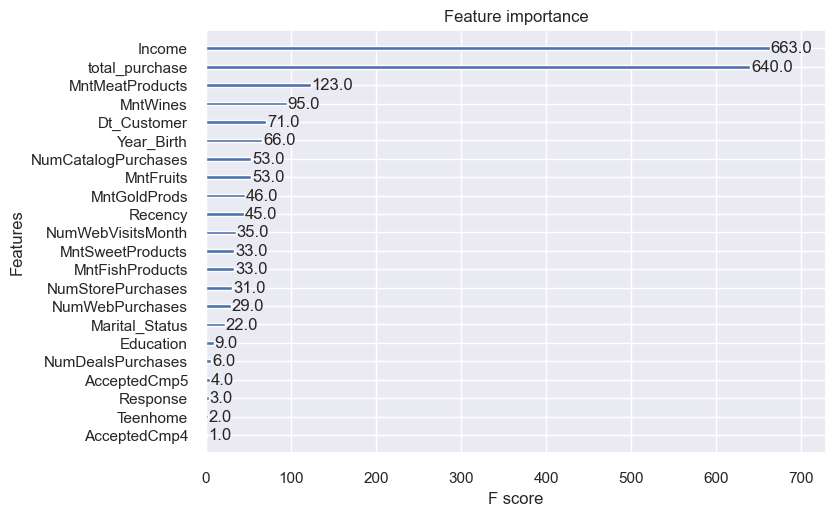

In [131]:
import xgboost as xgb
x = mc.drop(['K_Means', 'ID'], axis = 1) 
y = mc.K_Means

model = xgb.XGBClassifier()
model.fit(x, y)
 
# Print feature importance scores
xgb.plot_importance(model)

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
28,total_purchase,7156.219379
3,Income,3236.373854
8,MntWines,1588.397110
10,MntMeatProducts,1339.641932
16,NumCatalogPurchases,1014.464847
17,NumStorePurchases,797.629506
11,MntFishProducts,370.311463
15,NumWebPurchases,369.258988
12,MntSweetProducts,325.054887
9,MntFruits,324.328592


In [133]:
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'total_purchase', 'K_Means'],
      dtype='object')

In [134]:
select_cols = ['Income', 'total_purchase', 'Recency', 'Marital_Status', 'Education', 'Kidhome','Teenhome']

x = mc[select_cols]
y = mc.K_Means

In [136]:
# split in train and test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

 #create a RandomForestClassifirer instance
forestclas = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split= 10, random_state= 5)

# #  fit the model to the training data
forestclas.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

 #create a RandomForestClassifirer instance
forestModel = RandomForestClassifier()

#  fit the model to the training data
forestModel.fit(xtrain, ytrain)

# make predictions on the training data
train_pred = forestModel.predict(xtrain)

# print classification report
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       358
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       223
           4       1.00      1.00      1.00       473

    accuracy                           1.00      1766
   macro avg       1.00      1.00      1.00      1766
weighted avg       1.00      1.00      1.00      1766



In [139]:
 #create a RandomForestClassifirer instance
fm = RandomForestClassifier()

#  fit the model to the test data
fm.fit(xtest, ytest)

# make predictions on the training data
test_pred = fm.predict(xtest)

# print classification report
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00       118

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



In [140]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,ytest),2))
    scores.append(round(accuracy_score(y_pred,ytest),2))

Accuracy for k= 1 is: 0.75
Accuracy for k= 2 is: 0.74
Accuracy for k= 3 is: 0.74
Accuracy for k= 4 is: 0.73
Accuracy for k= 5 is: 0.73
Accuracy for k= 6 is: 0.72
Accuracy for k= 7 is: 0.75
Accuracy for k= 8 is: 0.74
Accuracy for k= 9 is: 0.76
Accuracy for k= 10 is: 0.74
Accuracy for k= 11 is: 0.75
Accuracy for k= 12 is: 0.75
Accuracy for k= 13 is: 0.76
Accuracy for k= 14 is: 0.74
Accuracy for k= 15 is: 0.78
Accuracy for k= 16 is: 0.78
Accuracy for k= 17 is: 0.79
Accuracy for k= 18 is: 0.77
Accuracy for k= 19 is: 0.83


In [141]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(xtrain,ytrain)
train_prediction = knn.predict(xtrain)
print(classification_report(ytrain, train_prediction))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       422
           1       0.79      0.89      0.83       358
           2       0.82      0.65      0.73       290
           3       0.91      0.75      0.82       223
           4       0.74      0.82      0.78       473

    accuracy                           0.80      1766
   macro avg       0.82      0.79      0.80      1766
weighted avg       0.81      0.80      0.80      1766



Decision Tree

In [144]:
# fitting decision tree model on data
from sklearn.tree import DecisionTreeClassifier
response_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
response_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [145]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
treeModel = DecisionTreeClassifier()

# Fit the model to your training data
treeModel.fit(xtrain, ytrain)

# Make predictions on new data
train_preds = treeModel.predict(xtrain)

print(f"The Train Prediction is {train_preds}")





The Train Prediction is [0 1 2 ... 3 0 1]


In [147]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
treeModel = DecisionTreeClassifier()

# Fit the model to your training data
treeModel.fit(xtrain, ytrain)

# Make predictions on new data
test_preds = treeModel.predict(xtest)



print(test_preds)

[0 1 3 2 1 2 4 3 0 0 4 1 1 0 3 1 2 4 1 0 2 0 0 0 1 0 1 4 3 0 1 0 2 1 1 4 4
 2 0 1 3 4 4 4 3 4 0 1 2 4 0 0 0 3 1 2 2 4 4 4 0 3 1 0 1 1 1 1 3 4 2 3 2 4
 1 2 4 1 0 1 3 2 0 3 4 4 1 2 0 0 0 4 4 1 4 3 4 4 4 4 1 1 3 1 1 1 4 0 0 4 0
 1 4 0 0 2 4 3 4 2 1 4 0 2 4 1 0 4 4 0 4 0 4 0 0 1 1 0 2 4 2 2 1 1 3 2 1 2
 3 0 4 0 4 0 1 2 4 3 4 1 4 3 4 4 0 1 2 2 2 1 0 4 0 1 0 4 3 3 4 1 1 3 0 4 4
 4 4 0 3 0 3 1 0 4 2 2 4 0 4 0 4 2 1 4 1 0 0 0 0 2 0 4 0 0 1 4 2 1 1 4 3 3
 3 4 3 0 2 4 0 0 0 3 0 3 0 0 2 0 1 1 0 2 1 2 4 0 1 4 0 1 1 4 4 4 2 1 2 0 1
 0 1 2 3 1 0 2 2 1 3 4 0 1 1 4 4 1 4 4 3 3 2 2 1 1 0 4 4 4 2 4 0 1 2 4 1 3
 2 3 1 4 3 0 4 1 2 4 0 4 3 1 0 4 0 0 1 4 1 4 0 3 4 4 0 1 0 2 0 2 4 0 4 0 2
 4 2 4 0 0 3 0 1 0 0 1 1 3 1 0 2 0 1 3 3 0 2 3 2 0 2 3 4 0 3 4 1 3 4 3 4 2
 2 4 4 3 0 2 3 2 0 3 1 1 0 4 4 4 2 2 1 4 4 0 1 0 2 4 3 0 4 2 1 4 0 0 0 1 0
 0 2 0 2 2 2 4 3 4 4 1 1 2 4 1 1 2 0 1 4 4 4 4 1 0 1 4 3 4 4 4 4 2 2 3]


Accuracy: 1.0


<Axes: >

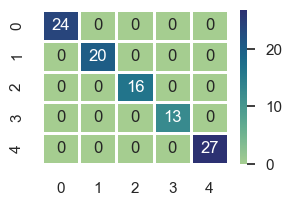

In [148]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(ytrain, train_preds)
print("Accuracy:", train_accuracy)


reveal = confusion_matrix(ytrain, train_preds)
plt.figure(figsize= (3,2))
sns.set(style = 'dark')
sns.heatmap(reveal/np.sum(reveal)*100, annot =True, cmap = 'crest', linewidth=1)


NUMBER TWO

In [149]:
mc['Number_of_children'] = mc.Kidhome + mc.Teenhome

mc.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchase,K_Means,Number_of_children
0,-0.019364,-0.984809,2,4,0.314089,-0.823235,-0.930428,80,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,0.362555,1.426013,2.628870,-0.561314,0.690245,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,2.372895,1.669680,3,-1.753663
1,-1.050649,-1.235034,2,4,-0.255431,1.039166,0.907126,157,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,-0.167943,-1.132369,-0.587934,-1.178383,-0.138499,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,-0.971509,4,1.946292
2,-0.445115,-0.317541,2,5,0.964782,-0.823235,-0.930428,444,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,-0.698440,1.426013,-0.230512,1.289891,-0.552871,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.097991,0.0,0.0,-0.421426,0.294163,1,-1.753663


In [ ]:
# Data Preprocessing
def outlier(dataframe, a, b):
    plt.figure(figsize = (12, 3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    plt.title(f"{a} bo9xplot")
87
    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    plt.title(f"{b} boxplot")

outlier(mc, 'Income', 'total_purchase')